In [2]:
# !pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
    --------------------------------------- 0.5/38.8 MB 3.4 MB/s eta 0:00:12
   - -------------------------------------- 1.0/38.8 MB 2.5 MB/s eta 0:00:16
   - -------------------------------------- 1.3/38.8 MB 2.8 MB/s eta 0:00:14
   - -------------------------------------- 1.8/38.8 MB 2.3 MB/s eta 0:00:17
   -- ------------------------------------- 2.4/38.8 MB 2.2 MB/s eta 0:00:17
   -- ------------------------------------- 2.6/38.8 MB 2.2 MB/s eta 0:00:17
   --- ------------------------------------ 3.1/38.8 MB 2.1 MB/s eta 0:00:18
   --- ------------------------------------ 3.4/38.8 MB 2.0 MB/s eta 0:00:18
   ---- ----------------------------------- 3.9/38.8 MB 2.0 MB/s eta 0:00:18
   ---- ----------------------------------- 4.2/38.8 MB 2.0 MB/s eta 0:00:18
   ---- ----------------------------------- 4.5/38.8 MB 2.0 MB/s eta 0:00:18
   ----- ---------------------------------- 5.0/38.8 MB 2.0 MB/s eta 0:00:18
   ---

['banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana'
 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana'
 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana'
 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana'
 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana' 'banana'
 'cucumber' 'cucumber' 'cucumber' 'cucumber' 'cucumber' 'cucumber'
 'cucumber' 'cucumber' 'cucumber' 'cucumber' 'cucumber' 'cucumber'
 'cucumber' 'cucumber' 'cucumber' 'cucumber' 'cucumber' 'cucumber'
 'cucumber' 'cucumber' 'cucumber' 'cucumber' 'cucumber' 'cucumber'
 'cucumber' 'cucumber' 'cucumber' 'cucumber' 'cucumber' 'cucumber'
 'cucumber']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.4236 - loss: 0.6946
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0

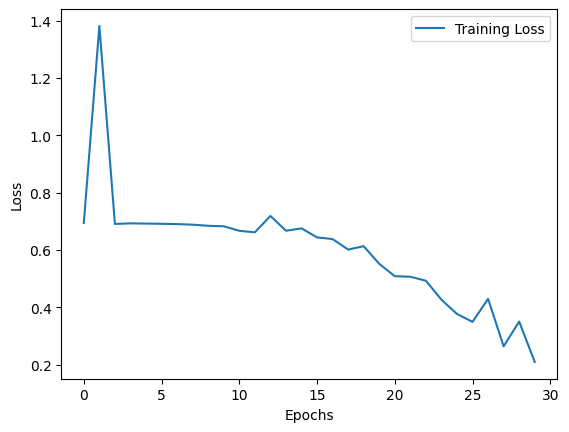

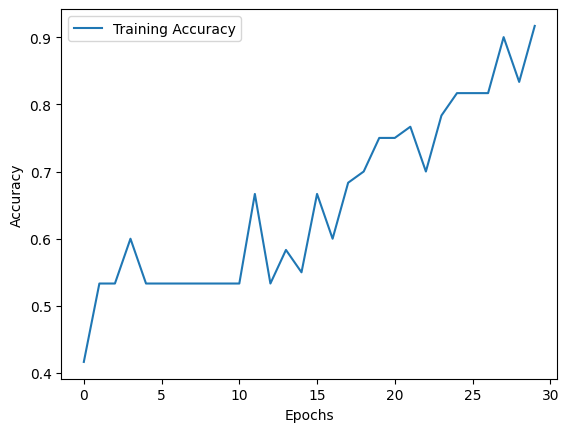

Test accuracy: 72.72727489471436


In [7]:
#import
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#dataset input || training
def load_data(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        label = folder.split('/')[-1]
        img = cv2.imread(os.path.join(folder, filename))
        img = cv2.resize(img, (150, 150))  # Resize the image to a consistent size
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        images.append(img)
        labels.append(label)
    return images, labels


banana_folder = 'dataset/banana'
cucumber_folder = 'dataset/cucumber'

banana_images, banana_labels = load_data(banana_folder)
cucumber_images, cucumber_labels = load_data(cucumber_folder)

# Combine the data
images = np.array(banana_images + cucumber_images)
labels = np.array(banana_labels + cucumber_labels)
print(labels)

# Encode labels to numerical values
label_dict = {'banana': 0, 'cucumber': 1}
encoded_labels = np.array([label_dict[label] for label in labels])
print(encoded_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.15,random_state=42)

# Normalize the pixel values between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

#Adding CNN layer and epoch running
import matplotlib.pyplot as plt

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('Test accuracy:', accuracy*100)


In [6]:
#Test image
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to the test image
test_image_path = 'pic3.jpg'  # Replace with the actual path of your test image

# Load and preprocess the test image
test_image = image.load_img(test_image_path, target_size=(150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0  # Normalize the image

# Predict the class of the test image
prediction = model.predict(test_image)
print('prediction',prediction)
if prediction < 0.5:
  print('This is Banana')
elif prediction >= 0.5:
  print('This is Cucumber')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
prediction [[0.5619031]]
This is Cucumber
